# Week 5: Our descent into PCA

## Goals
- Hands on PCA 
- `filter` and `None`
- Plenty of plots plotted in a plot

## PCA and sustainability

Let's load up the same data set from last week and play around with it. 

First let's load the modules we'll use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_big = pd.read_csv("data/global-data-on-sustainable-energy.csv")
df_big.head()             # Prints the first 5 rows

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Let's focus on three columns:
1. "Electricity from fossil fuels (TWh)"
2. "Electricity from nuclear (TWh)"
3. "Electricity from renewables (TWh)"

In [ ]:
df = pd.DataFrame({
    "f" : df_big["Electricity from fossil fuels (TWh)"], 
    "n" : df_big["Electricity from nuclear (TWh)"],
    "r" : df_big["Electricity from renewables (TWh)"]
})
# print(df)
# df.columns.values[1]

'n'

Now we want to make sure that all of our data is complete. We don't want any missing entries. Let's check.

### The `filter` function

We will use the `filter` function in Python.

Similar to `map`, the `filter` function runs through an iterable object (e.g. a list) and applies a function `f` on each entry. If on that entry `f` returns `True`, then that entry is kept; otherwise the entry is discarded.

In [8]:
L = [-2, -1, 0, 1, 2]
is_pos = lambda x: x > 0
is_pos(1)

True

In [9]:
list(filter(is_pos, L))     # Only the positive entries remain.

[1, 2]

### `None` objects

In Python there is a special object `None`. 

In [11]:
x = None
print(x)
L = [1, 4, None, 3]
print(L[0])
print(L[2])

None
1
None


In [12]:
def IsNone(x):
    if x:           # equal to "if x != None"
        print("You gave me something.")
        return False
    else:
        print("You gave me `None`.")
        return True

In [14]:
# print(IsNone(4))
print(IsNone(None))

You gave me `None`.
True


In [15]:
x = 1
x is None		# This is the way to decide if a var is 'None'.

False

Let's purposefully create a data frame without an entry.

In [16]:
miss = pd.DataFrame({
    "X" : [None, 6, None, 5], 
    "Y" : [7, 9, 11, 13]
})
print(miss)

     X   Y
0  NaN   7
1  6.0   9
2  NaN  11
3  5.0  13


In [17]:
print(f"The 0-entry in the 'X' column is: {miss["X"][0]}")
print(miss["X"][0] == None)
print(type(miss["X"][0]))

The 0-entry in the 'X' column is: nan
False
<class 'numpy.float64'>


To check if a value is a `numpy.nan` we need to use a special function.

In [18]:
print(np.isnan(miss["X"][0]))

True


Back to filtering out the rows with missing entries.

Now let's use `filter` to find all rows that have a missing entry. 

In [21]:
has_nan = lambda row: any(map(lambda x: np.isnan(x), row))
[(pair[0], has_nan(pair[1])) for pair in miss.iterrows()]
# [pair for pair in miss.iterrows()]

[(0, True), (1, False), (2, True), (3, False)]

In [24]:
baddies = list(filter(lambda pair: has_nan(pair[1]), df.iterrows()))
print(len(baddies))
# print(baddies)

126


Instead of working further on this, there is a [pandas method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) for doing exactly what we want. Let's do that.

In [25]:
df_clean = df.dropna()
list(filter(lambda pair: has_nan(pair[1]), df_clean.iterrows()))

[]

## Problem 1

Build a Python function that does the following:

**Input:** Given three `pandas` data frames `(df1, df2, df3)` each with 2 columns,

**Output:** A `matplotlib` plot of all three of the scatter plots in a single plot (2 x 2 grid of subplots).

Check out a [matplotlib example](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html#stacking-subplots-in-two-directions) on subplots stacking in both horizontal and vertical direction.

Testing the plot_three_dataframes function...
DataFrame 1 shape: (20, 2)
DataFrame 2 shape: (20, 2)
DataFrame 3 shape: (20, 2)


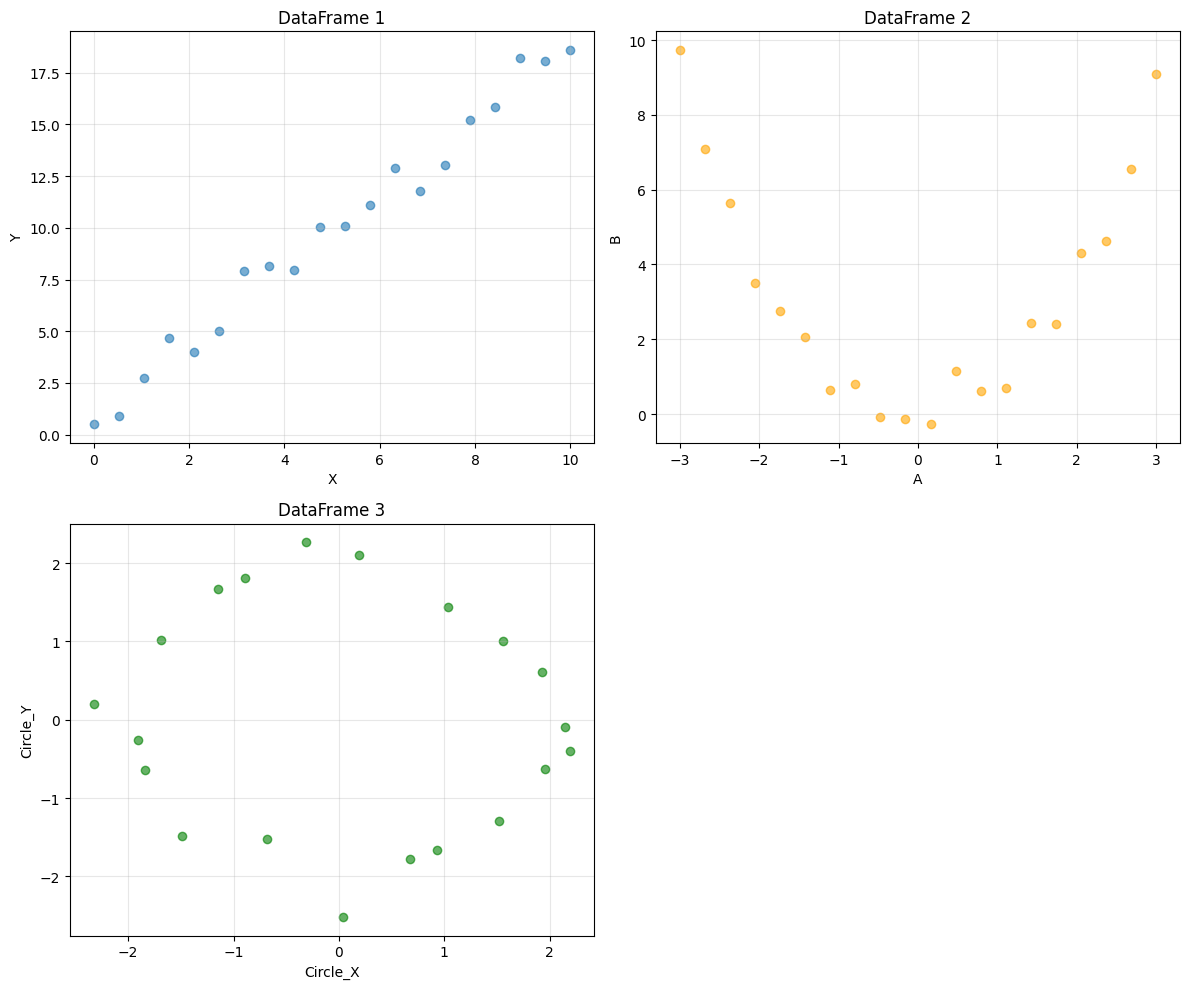

In [28]:
def plot_three_dataframes(df1, df2, df3):
    """
    Plot three pandas DataFrames as scatter plots in a 2x2 subplot grid.
    
    Parameters:
    df1, df2, df3: pandas DataFrames with 2 columns each
    
    Returns:
    matplotlib figure and axes
    """
    # Create a 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plot df1 in top-left (0,0)
    axes[0, 0].scatter(df1.iloc[:, 0], df1.iloc[:, 1], alpha=0.6)
    axes[0, 0].set_title('DataFrame 1')
    axes[0, 0].set_xlabel(df1.columns[0])
    axes[0, 0].set_ylabel(df1.columns[1])
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot df2 in top-right (0,1) 
    axes[0, 1].scatter(df2.iloc[:, 0], df2.iloc[:, 1], alpha=0.6, color='orange')
    axes[0, 1].set_title('DataFrame 2')
    axes[0, 1].set_xlabel(df2.columns[0])
    axes[0, 1].set_ylabel(df2.columns[1])
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot df3 in bottom-left (1,0)
    axes[1, 0].scatter(df3.iloc[:, 0], df3.iloc[:, 1], alpha=0.6, color='green')
    axes[1, 0].set_title('DataFrame 3')
    axes[1, 0].set_xlabel(df3.columns[0])
    axes[1, 0].set_ylabel(df3.columns[1])
    axes[1, 0].grid(True, alpha=0.3)
    
    # Leave bottom-right (1,1) empty or add a combined plot
    axes[1, 1].axis('off')  # Turn off the fourth subplot
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    return fig, axes

# Test case: Create three simple test DataFrames
np.random.seed(42)  # For reproducible results

# Test DataFrame 1: Linear relationship
x1 = np.linspace(0, 10, 20)
y1 = 2 * x1 + np.random.normal(0, 1, 20)
test_df1 = pd.DataFrame({'X': x1, 'Y': y1})

# Test DataFrame 2: Quadratic relationship  
x2 = np.linspace(-3, 3, 20)
y2 = x2**2 + np.random.normal(0, 0.5, 20)
test_df2 = pd.DataFrame({'A': x2, 'B': y2})

# Test DataFrame 3: Circular pattern
theta = np.linspace(0, 2*np.pi, 20)
x3 = 2 * np.cos(theta) + np.random.normal(0, 0.2, 20)
y3 = 2 * np.sin(theta) + np.random.normal(0, 0.2, 20)
test_df3 = pd.DataFrame({'Circle_X': x3, 'Circle_Y': y3})

# Test the function
print("Testing the plot_three_dataframes function...")
print(f"DataFrame 1 shape: {test_df1.shape}")
print(f"DataFrame 2 shape: {test_df2.shape}")
print(f"DataFrame 3 shape: {test_df3.shape}")

# Create the plot
fig, axes = plot_three_dataframes(test_df1, test_df2, test_df3)
plt.show()

## Problem 2

- Take the current data frame we have, `df_clean`, and construct the three principal components. 
- Project the data onto every pair of principal components, so onto (PC1, PC2), (PC1, PC3) and (PC2, PC3).
- For each of the three different projections, build a `pandas` data frame with two columns.
- Input these three data frames into your function.

In [ ]:
# Problem 2 Solution: PCA Analysis and Projections

# Step 1: Perform PCA on df_clean
from sklearn.decomposition import PCA

# Convert df_clean to numpy array for PCA
data_matrix = df_clean.values

# Perform PCA to get 3 principal components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_matrix)

print("PCA Analysis Results:")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")
print(f"PCA result shape: {pca_result.shape}")

# Step 2: Create DataFrames for each pair of principal components

# PC1 vs PC2
df_pc1_pc2 = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1]
})

# PC1 vs PC3  
df_pc1_pc3 = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC3': pca_result[:, 2]
})

# PC2 vs PC3
df_pc2_pc3 = pd.DataFrame({
    'PC2': pca_result[:, 1], 
    'PC3': pca_result[:, 2]
})

print("\nCreated DataFrames:")
print(f"PC1-PC2 DataFrame shape: {df_pc1_pc2.shape}")
print(f"PC1-PC3 DataFrame shape: {df_pc1_pc3.shape}")
print(f"PC2-PC3 DataFrame shape: {df_pc2_pc3.shape}")

# Step 3: Use our plotting function to visualize all three projections
print("\nGenerating PCA projection plots...")
fig, axes = plot_three_dataframes(df_pc1_pc2, df_pc1_pc3, df_pc2_pc3)

# Add more descriptive titles with variance explained
axes[0, 0].set_title(f'PC1 vs PC2\n(Explains {pca.explained_variance_ratio_[0]:.1%} + {pca.explained_variance_ratio_[1]:.1%} = {pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]:.1%} of variance)')
axes[0, 1].set_title(f'PC1 vs PC3\n(Explains {pca.explained_variance_ratio_[0]:.1%} + {pca.explained_variance_ratio_[2]:.1%} = {pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[2]:.1%} of variance)')
axes[1, 0].set_title(f'PC2 vs PC3\n(Explains {pca.explained_variance_ratio_[1]:.1%} + {pca.explained_variance_ratio_[2]:.1%} = {pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2]:.1%} of variance)')

plt.show()

# Optional: Show the principal component loadings (how original features contribute to PCs)
print("\nPrincipal Component Loadings:")
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=['Fossil Fuels', 'Nuclear', 'Renewables']
)
print(loadings_df)

## (Bonus) Problem 3

Repeat Problem 2 but rescale the data by incorporating the following function.

In [ ]:
def mat_to_rescaled_mat(Z):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(Z)
    return scaler.transform(Z)